In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount._DEBUG = True
drive.mount('/content/drive', force_remount=True)

unset HISTFILE; export PS1="root@ff7576439b96-62e8a87d0b164111b2f48cac1e49f6fb: "
bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
/content# root@ff7576439b96-62e8a87d0b164111b2f48cac1e49f6fb: umount -f /content/drive || umount /content/drive; pkill -9 -x drive
umount: /content/drive: no mount point specified.
umount: /content/drive: no mount point specified.
root@ff7576439b96-62e8a87d0b164111b2f48cac1e49f6fb: pkill -9 -f /opt/google/drive/directoryprefetcher_binary
root@ff7576439b96-62e8a87d0b164111b2f48cac1e49f6fb: ( while `sleep 0.5`; do if [[ -d "/content/drive" && "$(ls -A /content/drive)" != "" ]]; then echo "google.colab.drive MOUNTED"; break; fi; done ) &
[1] 203
root@ff7576439b96-62e8a87d0b164111b2f48cac1e49f6fb: ( /opt/google/drive/drive --features=fuse_max_background:1000,max_read_qps:1000,max_write_qps:1000,max_operation_batch_size:15,max_parallel_push_task_instances:10,opendir_timeout_ms:120000,virtual_folders_

In [3]:
import os
os.chdir('./drive/MyDrive/따릉이예측분석')

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1095 non-null   object 
 1   precipitation  417 non-null    float64
 2   temp_mean      1095 non-null   float64
 3   temp_highest   1095 non-null   float64
 4   temp_lowest    1095 non-null   float64
 5   PM10           1028 non-null   float64
 6   PM2.5          1027 non-null   float64
 7   humidity       1095 non-null   float64
 8   sunshine_sum   1090 non-null   float64
 9   sunshine_rate  1095 non-null   float64
 10  wind_mean      1095 non-null   float64
 11  wind_max       1095 non-null   float64
 12  rental         1095 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 111.3+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           365 non-null    object 
 1   precipitation  160 non-null    float64
 2   temp_mean      365 non-null    float64
 3   temp_highest   365 non-null    float64
 4   temp_lowest    365 non-null    float64
 5   PM10           365 non-null    float64
 6   PM2.5          365 non-null    float64
 7   humidity       365 non-null    float64
 8   sunshine_sum   364 non-null    float64
 9   sunshine_rate  365 non-null    float64
 10  wind_mean      365 non-null    float64
 11  wind_max       365 non-null    float64
dtypes: float64(11), object(1)
memory usage: 34.3+ KB


In [7]:
train = train.fillna(train.mean())
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,date,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental
0,2018-01-01,9.169544,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950
1,2018-01-02,9.169544,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136
2,2018-01-03,9.169544,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156
3,2018-01-04,9.169544,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102
4,2018-01-05,9.169544,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2020-12-27,0.000000,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,37103
1091,2020-12-28,1.300000,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,46912
1092,2020-12-29,0.200000,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,35747
1093,2020-12-30,9.169544,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2,22488


In [8]:
import matplotlib.pyplot as plt

plt.rc('font', family='AppleGothic')
plt.rcParams['font.size'] = 15

In [9]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,485 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [10]:
import matplotlib
matplotlib.rcParams['font.family'] = 'NanumSquare'
matplotlib.rcParams['font.size'] = 15

findfont: Font family ['NanumSquare'] not found. Falling back to DejaVu Sans.


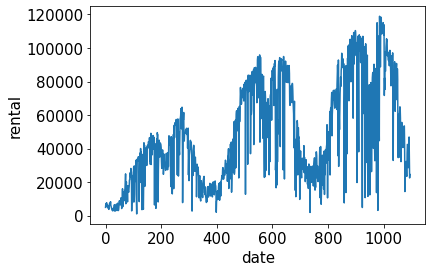

In [11]:
plt.plot(train['rental'])

plt.ylabel('rental')
plt.xlabel('date')
plt.show()

0~200일 동안은 대여 횟수 증가

200~300일 사이 약간 감소
 - 이때 온도가 30도가 넘음

300~400일 사이 대여 횟수 감소
 - 이때 온도가 감소

400~700일 사이 대여 횟수 증가
 - 온도 상승
 - 중간에 온도가 28~ 30도일 때는 다시 대여 횟수 감소 

700~800일 사이 대여 횟수 감소
 - 온도 감소 

- 대여횟수 증가와 감소가 주기적으로 발생함


## 가설 설정
- 온도가 대여횟수에 가장 큰 영향을 미칠 것이다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_te

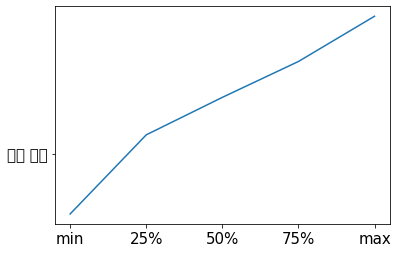

In [12]:
data = train.describe().loc['min':'max', 'temp_mean']

plt.plot(data)
plt.plot('온도 평균')

findfont: Font family ['NanumSquare'] not found. Falling back to DejaVu Sans.


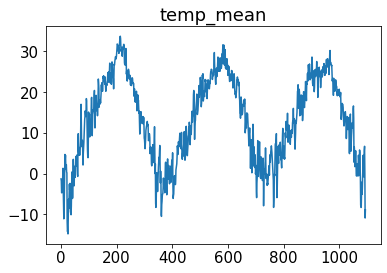

In [13]:
plt.plot(train['temp_mean'])

plt.title('temp_mean')
plt.show()

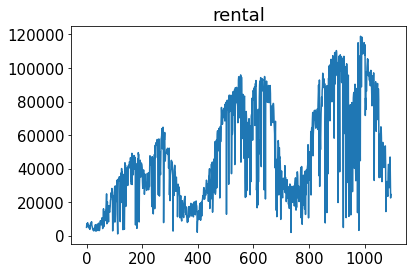

In [14]:
plt.plot(train['rental'])

plt.title('rental')
plt.show()

Text(0.5, 1.0, 'temp_mean')

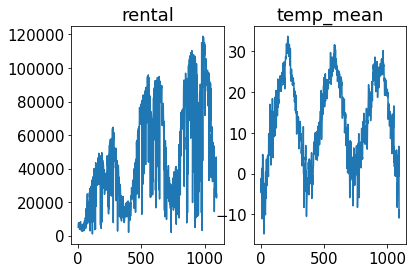

In [15]:
plt.subplot(1, 2, 1)
plt.plot(train['rental'])
plt.title('rental')

plt.subplot(1, 2, 2)
plt.plot(train['temp_mean'])
plt.title('temp_mean')

대여 횟수 그래프와 온도 평균 그래프를 비교해 본 결과 값이 증가하고 감소하는 주기가 비슷한 것을 확인할 수 있다.

Text(0, 0.5, '따릉이 대여 횟수')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_te

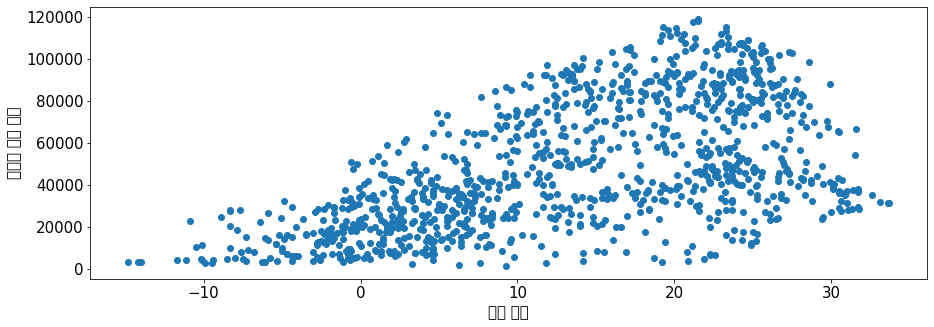

In [16]:
plt.figure(figsize=[15,5])

plt.scatter(y=train['rental'], x=train['temp_mean'])

plt.xlabel('온도 평균')
plt.ylabel('따릉이 대여 횟수')

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
rental_model = DecisionTreeRegressor()

In [19]:
rental_count = train['rental']
train_feature = train[['temp_mean']]
test_feature = test[['temp_mean']]

In [20]:
rental_model.fit(train_feature, rental_count)

DecisionTreeRegressor()

In [21]:
rental_count_predict = rental_model.predict(train_feature)
print(rental_count_predict)

[ 4950.         10263.         10025.66666667 ... 27902.
 22488.         24535.        ]


In [22]:
sample_submission['rental'] = rental_count_predict[:365]
sample_submission.to_csv('submission3.csv', index=False)

In [23]:
rental_count = train['rental']
train_feature = train[['temp_mean', 'temp_highest', 'temp_lowest']]
test_feature = test[['temp_mean', 'temp_highest', 'temp_lowest']]

In [24]:
rental_model.fit(train_feature, rental_count)

DecisionTreeRegressor()

In [25]:
rental_count_predict = rental_model.predict(train_feature)
print(rental_count_predict)

[ 4950.  7136.  7156. ... 35747. 22488. 24535.]


In [26]:
sample_submission['rental'] = rental_count_predict[:365]
sample_submission.to_csv('submission4.csv', index=False)

In [27]:
rental_count = train['rental']
train_feature = train[['temp_mean', 'temp_highest', 'temp_lowest', 'PM10', 'PM2.5', 'humidity', 'sunshine_sum', 'sunshine_rate', 'wind_mean', 'wind_max']]
test_feature = test[['temp_mean', 'temp_highest', 'temp_lowest', 'PM10', 'PM2.5', 'humidity', 'sunshine_sum', 'sunshine_rate', 'wind_mean', 'wind_max']]

In [28]:
rental_model.fit(train_feature, rental_count)

DecisionTreeRegressor()

In [71]:
rental_count_predict = rental_model.predict(test_feature)
print(rental_count_predict)

[ 5988.  7156. 14932.  7705.  3499.  4476.  4337.  4263.  4337.  4476.
  3591.  5988.  6408.  8563. 13324.  3591.  3591.  5988.  5028.  9388.
  6990.  2833. 13942. 10297. 14914.  8216.  8563.  4104.  4213.  7136.
  6148. 20029. 11911.  5988.  7705.  4675.  8216. 11255.  5821.  6863.
  8812. 13297. 14914. 15913. 33699.  4675.  3591.  3047. 14932. 17449.
 14914. 50343. 23925. 23535. 29239. 29239. 23035. 33699. 15913.  6408.
  8812.  6990. 14914. 23926. 30698. 16420. 14914. 23925. 14914. 44489.
 41973. 14914. 13297. 34673. 40263. 33699. 25557. 33738. 24308.  9943.
 17904. 10297. 15505. 34673. 49560. 39680.  1037. 15505. 44489. 33728.
 42039. 42039. 35668. 50343. 25557. 49889. 49889. 23499. 28236. 25557.
 34058. 49503. 24308. 41911. 25963. 40640. 41911. 15505. 43870. 24411.
 33144. 39534. 33144. 42039. 49595. 57873. 17456. 21436. 51236. 29492.
 29492. 34673. 52181. 29492. 21436. 37851. 17456. 21436. 37851. 36549.
 58200. 41677. 55188. 47762.  8155.  3802.  7091. 35918. 38635. 33923.
 19629

In [30]:
sample_submission['rental'] = rental_count_predict[:365]
sample_submission.to_csv('submission5.csv', index=False)

### 온도가 높을수록 대여량은 감소할 것이다.

In [37]:
rental_count = train['rental'][:365]
train_feature = train[['temp_mean', 'temp_highest']][:365]
test_feature = test[['temp_mean', 'temp_highest']][:365]

In [38]:
rental_model.fit(train_feature, rental_count)

DecisionTreeRegressor()

In [70]:
rental_count_predict = rental_model.predict(test_feature)
print(rental_count_predict)

[ 5988.  7156. 14932.  7705.  3499.  4476.  4337.  4263.  4337.  4476.
  3591.  5988.  6408.  8563. 13324.  3591.  3591.  5988.  5028.  9388.
  6990.  2833. 13942. 10297. 14914.  8216.  8563.  4104.  4213.  7136.
  6148. 20029. 11911.  5988.  7705.  4675.  8216. 11255.  5821.  6863.
  8812. 13297. 14914. 15913. 33699.  4675.  3591.  3047. 14932. 17449.
 14914. 50343. 23925. 23535. 29239. 29239. 23035. 33699. 15913.  6408.
  8812.  6990. 14914. 23926. 30698. 16420. 14914. 23925. 14914. 44489.
 41973. 14914. 13297. 34673. 40263. 33699. 25557. 33738. 24308.  9943.
 17904. 10297. 15505. 34673. 49560. 39680.  1037. 15505. 44489. 33728.
 42039. 42039. 35668. 50343. 25557. 49889. 49889. 23499. 28236. 25557.
 34058. 49503. 24308. 41911. 25963. 40640. 41911. 15505. 43870. 24411.
 33144. 39534. 33144. 42039. 49595. 57873. 17456. 21436. 51236. 29492.
 29492. 34673. 52181. 29492. 21436. 37851. 17456. 21436. 37851. 36549.
 58200. 41677. 55188. 47762.  8155.  3802.  7091. 35918. 38635. 33923.
 19629

In [41]:
sample_submission['rental'] = rental_count_predict[:365]
sample_submission.to_csv('submission7.csv', index=False)

In [45]:
submission_data = pd.read_csv('submission7.csv')

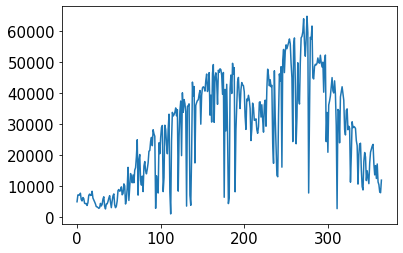

In [47]:
plt.plot(submission_data['rental'])
plt.show()

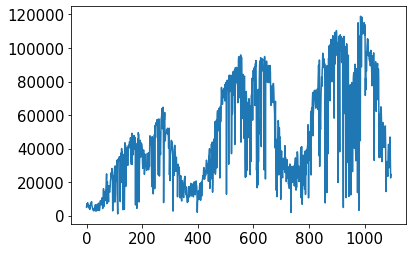

In [49]:
plt.plot(train['rental'])
plt.show()

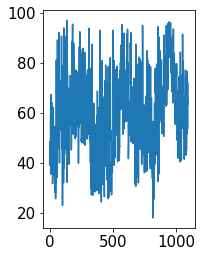

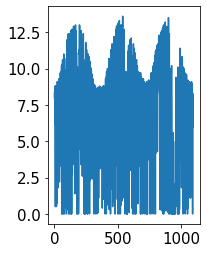

In [57]:
plt.subplot(1, 2, 1)
plt.plot(train['humidity'])
plt.show()

plt.subplot(1, 2, 2)
plt.plot(train['sunshine_sum'])
plt.show()

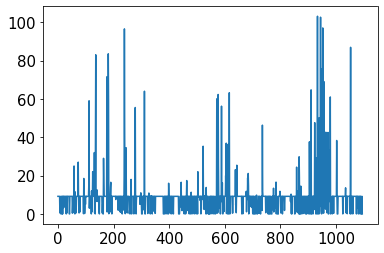

In [64]:
plt.plot(train['precipitation'])
plt.show()

### 온도 데이터와 습도 데이터 이용

In [65]:
rental_count = train['rental'][:365]
train_feature = train[['temp_mean', 'humidity']][:365]
test_feature = test[['temp_mean', 'humidity']][:365]

In [66]:
rental_model.fit(train_feature, rental_count)

DecisionTreeRegressor()

In [68]:
rental_count_predict = rental_model.predict(test_feature)
print(rental_count_predict)

[ 5988.  7156. 14932.  7705.  3499.  4476.  4337.  4263.  4337.  4476.
  3591.  5988.  6408.  8563. 13324.  3591.  3591.  5988.  5028.  9388.
  6990.  2833. 13942. 10297. 14914.  8216.  8563.  4104.  4213.  7136.
  6148. 20029. 11911.  5988.  7705.  4675.  8216. 11255.  5821.  6863.
  8812. 13297. 14914. 15913. 33699.  4675.  3591.  3047. 14932. 17449.
 14914. 50343. 23925. 23535. 29239. 29239. 23035. 33699. 15913.  6408.
  8812.  6990. 14914. 23926. 30698. 16420. 14914. 23925. 14914. 44489.
 41973. 14914. 13297. 34673. 40263. 33699. 25557. 33738. 24308.  9943.
 17904. 10297. 15505. 34673. 49560. 39680.  1037. 15505. 44489. 33728.
 42039. 42039. 35668. 50343. 25557. 49889. 49889. 23499. 28236. 25557.
 34058. 49503. 24308. 41911. 25963. 40640. 41911. 15505. 43870. 24411.
 33144. 39534. 33144. 42039. 49595. 57873. 17456. 21436. 51236. 29492.
 29492. 34673. 52181. 29492. 21436. 37851. 17456. 21436. 37851. 36549.
 58200. 41677. 55188. 47762.  8155.  3802.  7091. 35918. 38635. 33923.
 19629

In [69]:
sample_submission['rental'] = rental_count_predict[:365]
sample_submission.to_csv('submission8.csv', index=False)

In [79]:
rental_count = train['rental'][:365]
train_feature = train[['temp_mean', 'humidity', 'sunshine_rate']][:365]
test_feature = test[['temp_mean', 'humidity', 'sunshine_rate']][:365]

In [80]:
rental_model.fit(train_feature, rental_count)

DecisionTreeRegressor()

In [81]:
rental_count_predict = rental_model.predict(test_feature)
print(rental_count_predict)

[ 7102.  5681.  3591.  7102.  5231.  5681.  4337.  5681.  5681.  3499.
  3591.  3756. 23788. 20917.  8225.  4476.  3047.  3756.  5681.  3047.
  8225.  2833. 12721. 17904. 14914.  8216. 20917.  4104.  5681. 11765.
  7198. 23926.  5681.  7102.  5681.  4675.  8216.  6990. 14932.  8342.
  4230.  9943. 37382. 39009. 33699.  4675.  3591.  4476.  5681. 20917.
 37629. 50343. 23925. 23535. 29239. 13205. 15913. 18415. 23035.  4230.
  6408. 14028. 28806. 18415. 13297. 15136. 18415. 17904. 40263. 49560.
  8095. 37629. 12721. 24308. 16029. 16029. 49560. 51808. 23616. 20882.
 18415. 37629. 25963. 34194. 25673. 24560.  1037. 44876. 43471. 33728.
 35159. 39036. 23616. 22994. 36406. 52181. 36406. 28236. 28885. 37851.
 35159. 24560. 24308. 18415. 40640. 44876. 33699. 50343. 57280. 32989.
 32629. 56212.  8095. 39036. 36858. 51808. 24560. 22994. 29497. 29492.
 17444. 34194. 52181. 23616. 52181. 24411. 21436. 21436. 33738. 24560.
 33738. 54213. 53984. 47762. 24317.  3802.  7091. 35918. 63866.  8095.
 26817

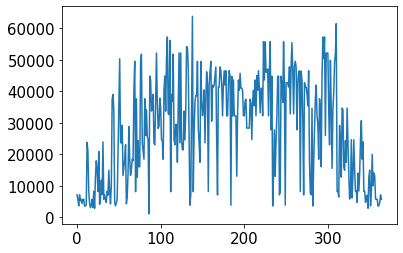

In [82]:
plt.plot(rental_count_predict)
plt.show()

In [83]:
sample_submission['rental'] = rental_count_predict[:365]
sample_submission.to_csv('submission.csv', index=False)

temp_mean, humidity, sunshine_rate 이용

데이터 단위 변환 - Scaling

In [84]:
from scipy.stats import boxcox

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
from sklearn import preprocessing
train['temp_mean'] = preprocessing.scale(train['temp_mean'])

,date,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental
0,2018-01-01,9.169544,MinMaxScaler(feature_range=0 -1.393122\n1...,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950
1,2018-01-02,9.169544,MinMaxScaler(feature_range=0 -1.393122\n1...,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136
2,2018-01-03,9.169544,MinMaxScaler(feature_range=0 -1.393122\n1...,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156
3,2018-01-04,9.169544,MinMaxScaler(feature_range=0 -1.393122\n1...,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102
4,2018-01-05,9.169544,MinMaxScaler(feature_range=0 -1.393122\n1...,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2020-12-27,0.000000,MinMaxScaler(feature_range=0 -1.393122\n1...,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,37103
1091,2020-12-28,1.300000,MinMaxScaler(feature_range=0 -1.393122\n1...,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,46912
1092,2020-12-29,0.200000,MinMaxScaler(feature_range=0 -1.393122\n1...,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,35747
1093,2020-12-30,9.169544,MinMaxScaler(feature_range=0 -1.393122\n1...,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2,22488
